In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import torch
import matplotlib.pyplot as plt
from collections import Counter

from orthogonal_dfa.l_star.examples.bernoulli_parity import BernoulliRegex
from orthogonal_dfa.l_star.structures import DecisionTreeLeafNode
from orthogonal_dfa.l_star.sampler import UniformSampler
from orthogonal_dfa.l_star.decision_tree_to_dfa import *
from orthogonal_dfa.utils.pdfa import batched_iterated_matrix_multiply

In [4]:
oracle = BernoulliRegex(0.9, 0, regex=r".*111111.*")

In [5]:
us = UniformSampler(40)

In [6]:
rng = np.random.default_rng(0)
np.mean([oracle.membership_query(us.sample(rng, alphabet_size=2)) for _ in range(1000)])

np.float64(0.299)

In [7]:
pst = PrefixSuffixTracker.create(
    us,
    np.random.default_rng(0),
    oracle,
    alphabet_size=2,
    num_prefixes=500,
    suffix_family_size=100,
    chi_squared_p_min=0.005,
    evidence_thresh=0.55,
    suffix_prevalence=0.05,
)
# dt = pst.extract_decision_tree()

In [8]:
fdt = abstract_interpretation_algorithm(pst, min_state_size=0.05)

Completing suffix family:  41%|####1     | 41/99 [00:01<00:01, 39.97it/s]

Num states: 1; processing []


Prepending to all suffixes:  76%|#######6  | 76/100 [00:01<00:00, 75.55it/s]

Prepending to all suffixes:  76%|#######6  | 76/100 [00:01<00:00, 75.53it/s]

Num states: 2; processing [1]
Done
Num states: 2; processing [0]
Done


In [9]:
dt = flat_decision_tree_to_decision_tree(fdt)
dfa = pst.optimal_dfa(fdt)

Best DFA has success rate on 'correct' states 0.5000


In [10]:
results = pst.add_counterexample_prefixes(dt, dfa, 500)
np.mean([r[0][-5:] for r in results], 0)

  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:  19%|#9        | 97/500 [00:01<00:04, 96.57it/s]

array([0.988, 1.   , 1.   , 1.   , 1.   ])

In [11]:
fdt = abstract_interpretation_algorithm(pst, min_state_size=0.05)

Num states: 1; processing []


Prepending to all suffixes:  54%|#####4    | 54/100 [00:01<00:00, 53.21it/s]

Prepending to all suffixes:  55%|#####5    | 55/100 [00:01<00:00, 54.80it/s]

Num states: 2; processing [1]


Prepending to all suffixes:  35%|###5      | 35/100 [00:01<00:01, 34.77it/s]

Prepending to all suffixes:  36%|###6      | 36/100 [00:01<00:01, 35.25it/s]

Num states: 3; processing [1, 1]
Done
Num states: 3; processing [0, 1]
Done
Num states: 3; processing [0]
Done


In [12]:
dt = flat_decision_tree_to_decision_tree(fdt)
dfa = pst.optimal_dfa(fdt)

Best DFA has success rate on 'correct' states 0.5000


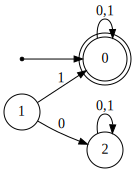

In [13]:
dfa

In [14]:
results = pst.add_counterexample_prefixes(dt, dfa, 500)
np.mean([r[0][-5:] for r in results], 0)

  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   9%|8         | 43/500 [00:01<00:10, 42.53it/s]

array([0.014, 1.   , 1.   , 1.   , 1.   ])

In [15]:
fdt = abstract_interpretation_algorithm(pst, min_state_size=0.05)

Num states: 1; processing []


Prepending to all suffixes:  47%|####6     | 47/100 [00:01<00:01, 46.07it/s]

Prepending to all suffixes:  48%|####8     | 48/100 [00:01<00:01, 46.56it/s]

Num states: 2; processing [1]


Prepending to all suffixes:  47%|####6     | 47/100 [00:01<00:01, 46.36it/s]

Prepending to all suffixes:  47%|####6     | 47/100 [00:01<00:01, 46.76it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:  22%|##2       | 22/100 [00:01<00:03, 21.59it/s]

Prepending to all suffixes:  23%|##3       | 23/100 [00:01<00:03, 22.50it/s]

Num states: 4; processing [1, 1, 1]
Done
Num states: 4; processing [0, 1, 1]
Done
Num states: 4; processing [0, 1]
Done
Num states: 4; processing [0]
Done


In [16]:
dt = flat_decision_tree_to_decision_tree(fdt)
dfa = pst.optimal_dfa(fdt)

Best DFA has success rate on 'correct' states 0.5000


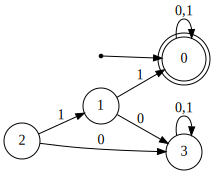

In [17]:
dfa

In [18]:
results = pst.add_counterexample_prefixes(dt, dfa, 500)
np.mean([r[0][-5:] for r in results], 0)

  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   5%|5         | 27/500 [00:01<00:17, 26.42it/s]

array([0.508, 0.04 , 1.   , 1.   , 1.   ])

In [19]:
fdt = abstract_interpretation_algorithm(pst, min_state_size=0.05)

Num states: 1; processing []


Prepending to all suffixes:  56%|#####6    | 56/100 [00:01<00:00, 52.68it/s]

Prepending to all suffixes:  56%|#####6    | 56/100 [00:01<00:00, 52.54it/s]

Num states: 2; processing [1]


Prepending to all suffixes:  56%|#####6    | 56/100 [00:01<00:00, 52.31it/s]

Prepending to all suffixes:  56%|#####6    | 56/100 [00:01<00:00, 52.62it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:  53%|#####3    | 53/100 [00:01<00:00, 52.79it/s]

Prepending to all suffixes:  53%|#####3    | 53/100 [00:01<00:00, 52.47it/s]

Num states: 4; processing [1, 1, 1]


Prepending to all suffixes:  15%|#5        | 15/100 [00:01<00:06, 14.16it/s]

Prepending to all suffixes:  15%|#5        | 15/100 [00:01<00:05, 14.26it/s]

Num states: 5; processing [1, 1, 1, 1]
Done
Num states: 5; processing [0, 1, 1, 1]
Done
Num states: 5; processing [0, 1, 1]
Done
Num states: 5; processing [0, 1]
Done
Num states: 5; processing [0]
Done


In [20]:
dt = flat_decision_tree_to_decision_tree(fdt)
dfa = pst.optimal_dfa(fdt)

Best DFA has success rate on 'correct' states 0.5109


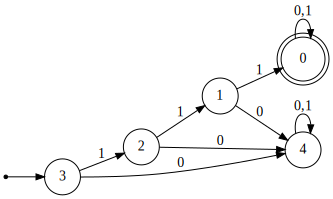

In [21]:
dfa

  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   4%|3         | 19/500 [00:01<00:25, 18.66it/s]

[0.434 0.456 0.026 1.    1.   ]
Num states: 1; processing []


Prepending to all suffixes:  35%|###5      | 35/100 [00:01<00:01, 34.88it/s]

Prepending to all suffixes:  35%|###5      | 35/100 [00:01<00:01, 34.97it/s]

Num states: 2; processing [1]


Prepending to all suffixes:  35%|###5      | 35/100 [00:01<00:01, 34.37it/s]

Prepending to all suffixes:  35%|###5      | 35/100 [00:01<00:01, 34.62it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:  35%|###5      | 35/100 [00:01<00:01, 32.90it/s]

Prepending to all suffixes:  35%|###5      | 35/100 [00:01<00:01, 34.49it/s]

Num states: 4; processing [1, 1, 1]


Prepending to all suffixes:  34%|###4      | 34/100 [00:01<00:01, 33.21it/s]

Prepending to all suffixes:  34%|###4      | 34/100 [00:01<00:01, 33.22it/s]

Num states: 5; processing [1, 1, 1, 1]


Prepending to all suffixes:  12%|#2        | 12/100 [00:01<00:07, 11.08it/s]

Prepending to all suffixes:  11%|#1        | 11/100 [00:01<00:08, 10.99it/s]

Num states: 6; processing [1, 1, 1, 1, 1]
Done
Num states: 6; processing [0, 1, 1, 1, 1]
Done
Num states: 6; processing [0, 1, 1, 1]
Done
Num states: 6; processing [0, 1, 1]
Done
Num states: 6; processing [0, 1]
Done
Num states: 6; processing [0]
Done
Best DFA has success rate on 'correct' states 0.5241


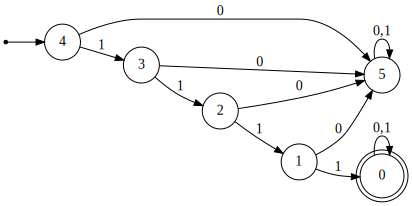

In [22]:
results = pst.add_counterexample_prefixes(dt, dfa, 500)
print(np.mean([r[0][-5:] for r in results], 0))
fdt = abstract_interpretation_algorithm(pst, min_state_size=0.05)
dt = flat_decision_tree_to_decision_tree(fdt)
dfa = pst.optimal_dfa(fdt)
dfa

In [23]:
results = pst.add_counterexample_prefixes(dt, dfa, 500)
print(np.mean([r[0][-5:] for r in results], 0))

  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   3%|2         | 14/500 [00:01<00:34, 13.95it/s]

[0.464 0.432 0.464 0.024 1.   ]


Num states: 1; processing []


Prepending to all suffixes:  34%|###4      | 34/100 [00:01<00:02, 30.73it/s]

Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 29.97it/s]

Num states: 2; processing [1]


Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 29.60it/s]

Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 29.74it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 29.52it/s]

Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 29.34it/s]

Num states: 4; processing [1, 1, 1]


Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 29.29it/s]

Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 29.65it/s]

Num states: 5; processing [1, 1, 1, 1]


Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 28.89it/s]

Prepending to all suffixes:  30%|###       | 30/100 [00:01<00:02, 28.91it/s]

Num states: 6; processing [1, 1, 1, 1, 1]


Prepending to all suffixes:   9%|9         | 9/100 [00:01<00:10,  9.00it/s]

Prepending to all suffixes:  10%|#         | 10/100 [00:01<00:09,  9.05it/s]

Num states: 7; processing [1, 1, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1]
Done
Num states: 7; processing [0, 1]
Done
Num states: 7; processing [0]
Done
Best DFA has success rate on 'correct' states 1.0000


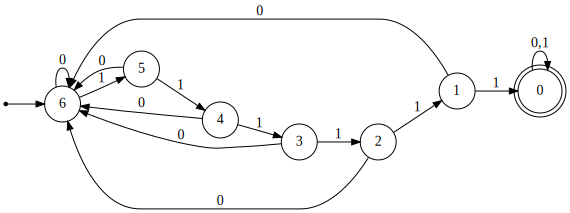

In [24]:
fdt = abstract_interpretation_algorithm(pst, min_state_size=0.01)
dt = flat_decision_tree_to_decision_tree(fdt)
dfa = pst.optimal_dfa(fdt)
dfa

In [25]:
# results = pst.add_counterexample_prefixes(dt, dfa, 500)
# print(np.mean([r[0][-5:] for r in results], 0))
# fdt = abstract_interpretation_algorithm(pst, min_state_size=0.01)
# dt = flat_decision_tree_to_decision_tree(fdt)
# dfa = pst.optimal_dfa(fdt)
# dfa